# KNN 

 - KNN is a simple yet powerful classification algorithm.
 - It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm.
 - The KNN algorithm have been widely used to find document similarity and pattern recognition

## KNN's Idea:- 

- The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. 
- It simply calculates the distance of a new data point to all other training data points.
- The distance can be of any type e.g Euclidean or Manhattan etc.
- It then selects the K-nearest data points, where K can be any integer. 
- Finally it assigns the data point to the class to which the majority of the K data points belong.

  - KNN: Look at the K closest labeled data points
  - Classification method.
  - First we need to train our data. Train = fit
  - fit(): fits the data, train the data.
  - predict(): predicts the data 
  - x: features
  - y: target variables(normal, abnormal)
  - n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points

## SUPERVISED LEARNING
    Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels normal and abnormal.
    There are features(predictor variable) and target variable. Features are like pelvic radius or sacral slope
    Target variables are labels normal and abnormal
    Aim is that as given features(input) predict whether target variable(output) is normal or abnormal
    Classification: target variable consists of categories like normal or abnormal
    Regression: target variable is continious like stock market
   


## Problem Statement :- Data for classifying patients based on two classes

## Biomechanical features of orthopedic patients

## Columns:-
    pelvic_incidence
    pelvic_tilt numeric
    lumbar_lordosis_angle
    sacral_slope
    pelvic_radius
    degree_spondylolisthesis
    class

## About Data :-
    The data have been organized in two different but related classification tasks.

    column_3C_weka.csv (file with three class labels)

    The first task consists in classifying patients as belonging to one out of three categories: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients).
    
    column_2C_weka.csv (file with two class labels)

    For the second task, the categories Disk Hernia and Spondylolisthesis were merged into a single category labelled as 'abnormal'. Thus, the second task consists in classifying patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 patients).

## Field Descriptions:

    Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

    pelvic incidence
    pelvic tilt
    lumbar lordosis angle
    sacral slope
    pelvic radius
    grade of spondylolisthesis

## Step 1:- Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('fast')


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


## STEP 2:-EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


- Features are pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, sacral_slope, pelvic_radius and degree_spondylolisthesis
- Target variable  is class

#### ROWS AND COLUMNS

In [4]:
data.shape

(310, 7)

In [5]:
print('No of columns in the dataset:',data.columns.size)
print("Name of Columns:\n",data.columns.values)

No of columns in the dataset: 7
Name of Columns:
 ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


#### To check about Numerics/Categorical Columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


 - length: 310 (range index)
 - Features are float
 - Target variables are object that is like string

#### Summary of the Data

In [7]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Pairplot on the data

The pair plot builds on two basic figures, the histogram and the scatter plot. 
The histogram on the diagonal allows us to see the distribution of a single variable, 
the scatter plots on the upper and lower triangles show the relationship between two variables.

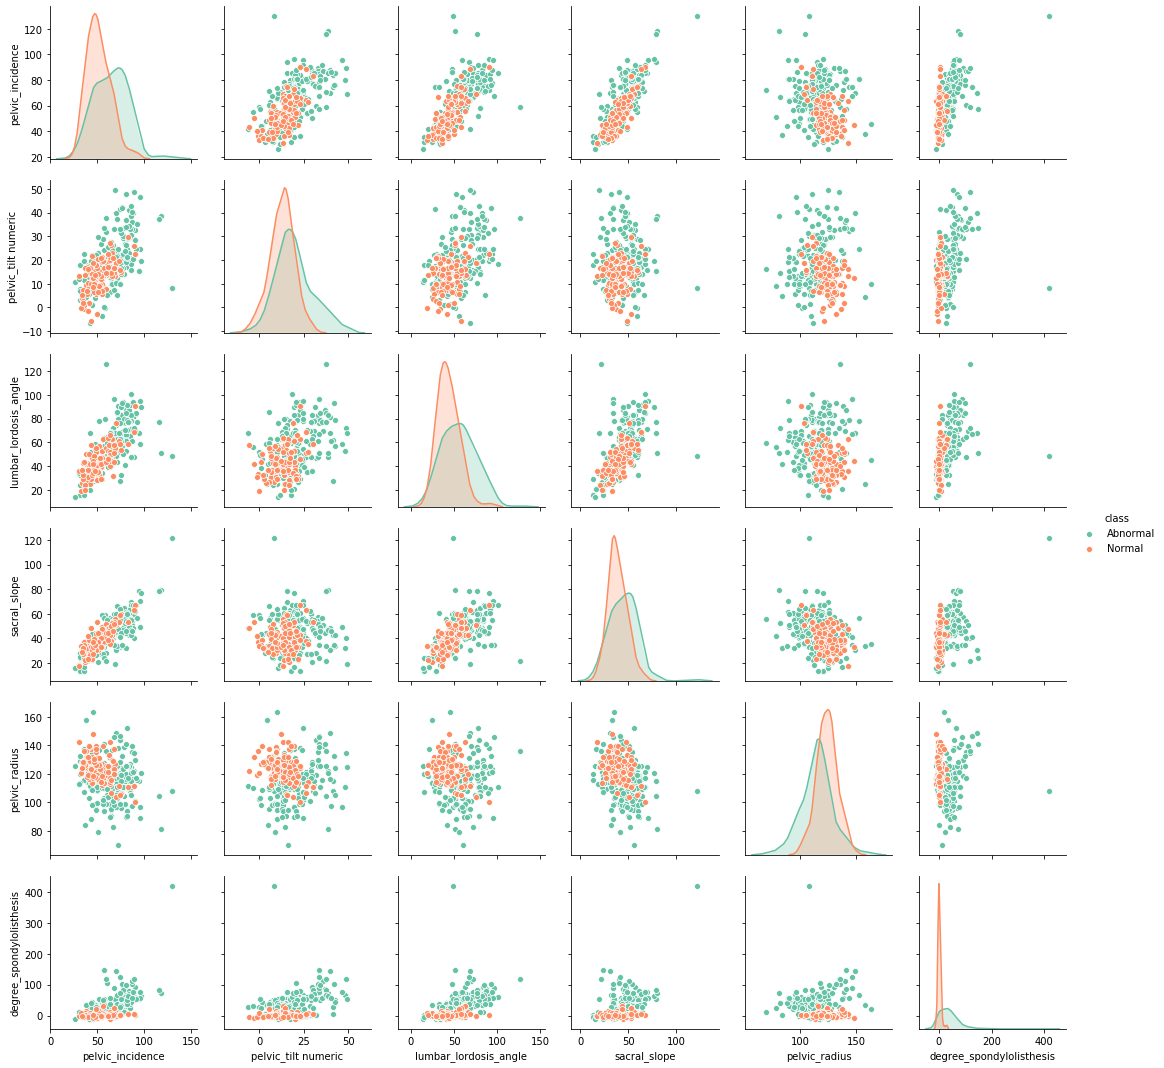

In [8]:
sns.pairplot(data,hue="class",palette="Set2")
plt.show()

##### pd.plotting.scatter_matrix:

    green: normal and red: abnormal
    c: color
    figsize: figure size
    diagonal: histogram of each features
    alpha: opacity
    s: size of marker
    marker: marker type

#### Scatter Matrix on the Data to find the relations among Features

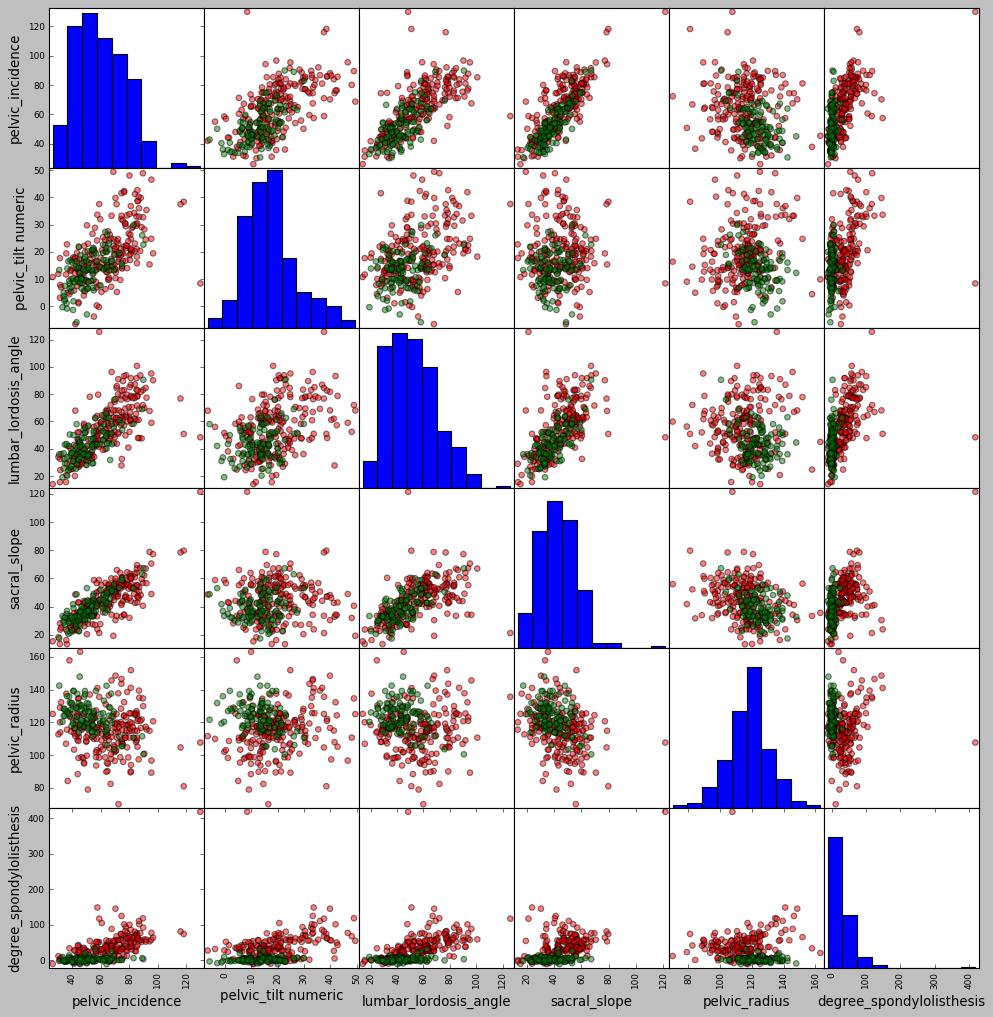

In [12]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

#### Class Distributuon

In [9]:
data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

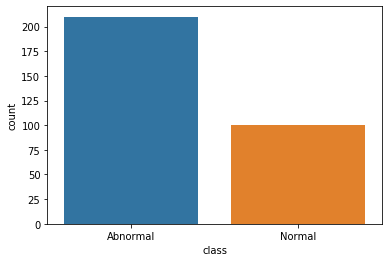

In [10]:
sns.countplot(x="class", data=data)


#### KNN Invoking

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

## Measuring model performance:
    Accuracy which is fraction of correct predictions is commonly used metric.

##  Split our data train and test sets.

    train: use train set by fitting
    test: make prediction on test set.
    With train and test sets, fitted data and tested data are completely different
    train_test_split(x,y,test_size = 0.3,random_state = 1)
    x: features
    y: target variables (normal,abnormal)
    test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
    random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
    fit(x_train,y_train): fit on train sets
    score(x_test,y_test)): predict and give accuracy on test sets

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)


In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
prediction = knn.predict(x_test)

In [16]:
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


## Model complexity:

    K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performance.
    Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
    If k is big, model that is less complex model can lead to underfit.
    At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 18(best performance), accuracy has highest value almost 88%.

In [17]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))


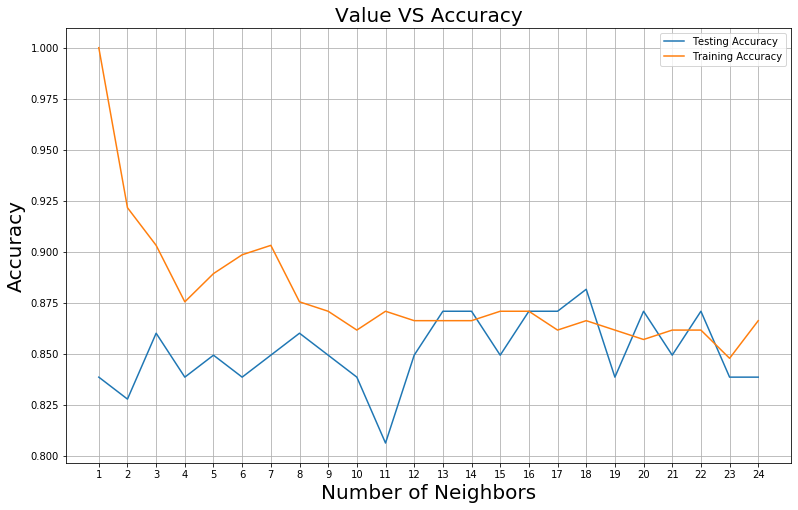

Best accuracy is 0.8817204301075269 with K = 18


In [18]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#### TUNING AND HYPERPARAMETERS

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')
knn_cv = GridSearchCV(knn, grid, cv=10) # GridSearchCV
knn_cv.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn_cv.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn_cv.score(x_test, y_test)))
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.81 out of 1 on test data
Tuned hyperparameter k: {'n_neighbors': 11}
Best score: 0.8571428571428571


G:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Pros and Cons of KNN


## Pros
- It is extremely easy to implement
- It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Since the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

## Cons
- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
- The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
- The KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.